## Image

In [27]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# config path
name_image = 'nt-2.jpg'

# root_img = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/img/' + name_image
# mask_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask-pred/' + name_image
# ms_nt_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/ms-nt/' + name_image

# root_img = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/save-all/images/' + name_image
# mask_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/save-all/masks/' + name_image
# ms_nt_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/ms-nt/' + name_image

root_img = 'C:/Users/Thep Ho/Desktop/Thesis/data/cus/256x256-notmark-data-augment/images/' + name_image
mask_pred = 'C:/Users/Thep Ho/Desktop/Thesis/data/cus/256x256-notmark-data-augment/masks/' + name_image
# ms_nt_pred = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/ms-nt/' + name_image

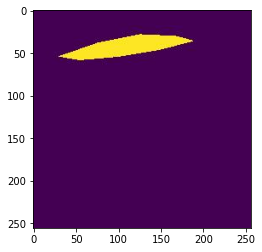

In [131]:
img = Image.open(mask_pred).convert('RGB')
img = np.reshape(img, (256, 256, 3))
# read it
# img = plt.imread(mask_pred) 
#convert img to grey
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# set a thresh
thresh = 100
#get threshold image
ret, thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(img)
plt.show()

## Find contours and detect nt point

In [132]:
def saveIt(img, name):
    plt.imsave('C:/Users/Thep Ho/Desktop/Thesis/z-results' + '/'  +  name, img)

# draw a line from vector and point
def drawLine(img, Vx, Vy, Px, Py):
    _, cols = img.shape[:2]
    lefty = int((-Px*Vy/Vx) + Py)
    righty = int(((cols-Px)*Vy/Vx)+Py)
    cv2.line(img, (cols-1, righty), (0, lefty), (0, 255, 0), 1)

In [133]:
root_height, root_weight = img.shape[:2]
print('root_height:', root_height)
print('root_weight:', root_weight)

#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# tìm vector và điểm của fitline
[fit_line_vx, fit_line_vy, fit_line_x, fit_line_y] = cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)

# Kẻ đường vuông góc với fitline
percentage_line_vx, percentage_line_vy = -fit_line_vy, fit_line_vx

root_height: 256
root_weight: 256


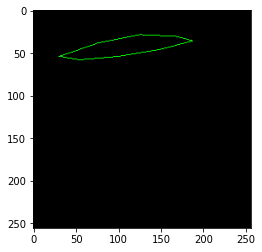

In [134]:
# contours mask
img_contours_mask = np.zeros(img.shape, np.uint8)
contour_img = np.zeros(img.shape, np.uint8)

cv2.drawContours(img_contours_mask, contours, -1, (0, 255, 0), 1)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

plt.imshow(img_contours_mask)
plt.show()

In [135]:
# centroid, area and max width, height
centroid = []
for c in contours:
    # find the center of the contour
    m = cv2.moments(c)
    centroid.append(int(m['m10']/m['m00']))
    centroid.append(int(m['m01']/m['m00']))

    # extract roi
    x, y, w, h = cv2.boundingRect(c)
    break
print(centroid)

[109, 42]


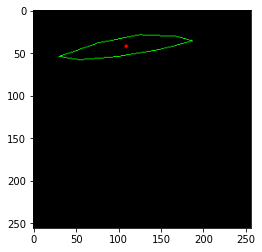

In [136]:
# draw centroid
cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
plt.imshow(img_contours_mask)
plt.show()

Text(0.5, 1.0, 'Centroid')

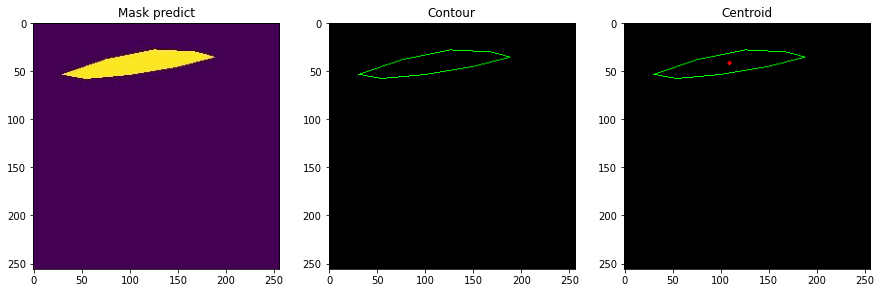

In [137]:
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img)
arr[0].set_title('Mask predict')
arr[1].imshow(contour_img)
arr[1].set_title('Contour')
arr[2].imshow(img_contours_mask)
arr[2].set_title('Centroid')
# fig.savefig('Ảnh từ mask sang contour.png')

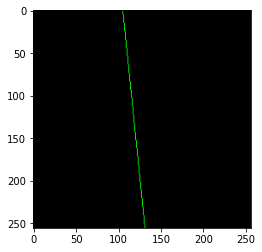

In [138]:
# Kẻ đường vuông góc với fitline và đi qua centroid point
line_mask = np.zeros(img.shape, np.uint8)
drawLine(line_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imshow(line_mask)
plt.show()

In [139]:
# Tìm giao điểm của đường vuông góc của fitline và 2 cạnh của nt_mask
img_contours_mask = np.array(img_contours_mask)
line_mask = np.array(line_mask)

rows, cols, _ = img.shape
nt_points = []

for i in range(0, rows):
    for j in range(0, cols):
        if img_contours_mask[i][j][1] == 255 and line_mask[i][j][1] == 255:
            nt_points.append([i, j])
            
print('len: ', len(nt_points))
print('nt_points: ', nt_points)

len:  2
nt_points:  [[32, 108], [52, 110]]


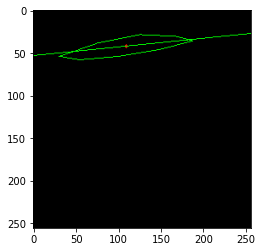

In [140]:
# draw fitline to contours 
drawLine(img_contours_mask, fit_line_vx, fit_line_vy, fit_line_x, fit_line_y)
plt.imshow(img_contours_mask)
plt.show()
# plt.imsave('6-1.png', img_contours_mask)

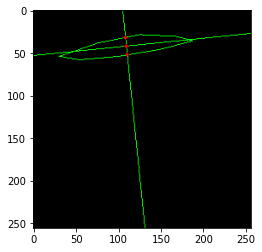

In [141]:
# draw percentage line to the contours mask
drawLine(img_contours_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
plt.imsave('5.png', img_contours_mask)
cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)
# draw nt points
cv2.circle(img_contours_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(img_contours_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
plt.imshow(img_contours_mask)
# plt.imsave('4-2.png', img_contours_mask)

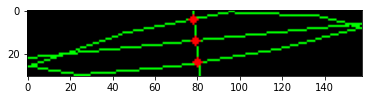

In [142]:
ROI = img_contours_mask[y:y+h, x:x+w]
plt.imshow(ROI)
plt.show()

## Result

In [143]:
root_img = plt.imread(root_img)
nt_mask = np.zeros(img.shape, np.uint8)

# visualize nt_mask
cv2.drawContours(nt_mask, contours, -1, (0, 255, 0), 1)
cv2.circle(nt_mask, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(nt_mask, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
cv2.line(nt_mask, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

# visualize root_img
cv2.drawContours(root_img, contours, -1, (0, 255, 0), 1)
cv2.circle(root_img, (nt_points[0][1], nt_points[0][0]), 2, (255, 0, 0), -1)
cv2.circle(root_img, (nt_points[1][1], nt_points[1][0]), 2, (255, 0, 0), -1)
cv2.line(root_img, (nt_points[0][1], nt_points[0][0]), (nt_points[1][1], nt_points[1][0]), (0, 0, 255), 1)

print(nt_points)
print('done!')

done!


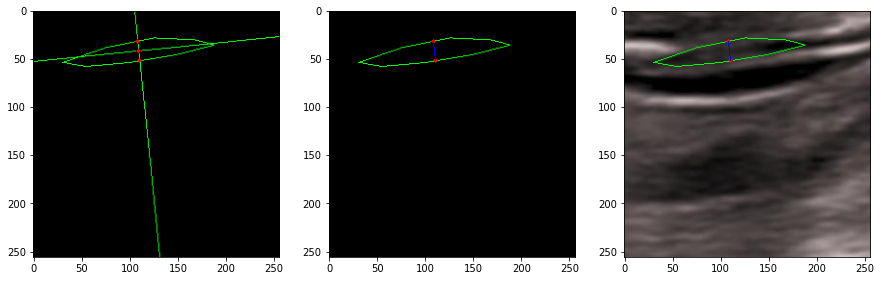

In [145]:
fig, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img_contours_mask)
arr[1].imshow(nt_mask)
arr[2].imshow(root_img)

In [147]:
# DPI (dots per inch) số điểm trên 1 inch, số pixel trên 1 inch
# CV2 không quan tâm tới chỉ số DPI, nó chỉ làm việc với ma trận điểm ảnh
# Tọa độ nhận được của 2 điểm nt là tọa độ pixel trên điểm ảnh vì thế
# Công thức chuyển đổi từ tọa độ pixel sang tọa độ thực với đơn vị mm như sau:

# im = Image.open('0.png')
# DPI = im.info['dpi']
# DPI = [99.99]

# standard
DPI = [200]

inch_to_mm = 25.4

def mDistance(x1, y1, x2, y2):
    return ((((x1 - x2)/DPI[0])**2 + ((y1 - y2)/DPI[0])**2)**0.5)*inch_to_mm

(x1, y1, x2, y2) = (nt_points[0][0], nt_points[0][1], nt_points[1][0], nt_points[1][1])

nt1 = round(mDistance(x1, y1, x2, y2), 3)
print('nt1: ', nt1, 'mm')

nt1:  2.553 mm


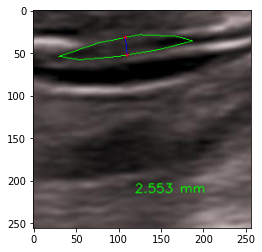

In [148]:
x = round((x1 + x2)/2)
y = round((y1 + y2)/2)
image = cv2.putText(root_img, str(nt1) + ' mm', (y + 10, 256 - x), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(image)

### Save fig for theiss

FileNotFoundError: [Errno 2] No such file or directory: '0.jpg'

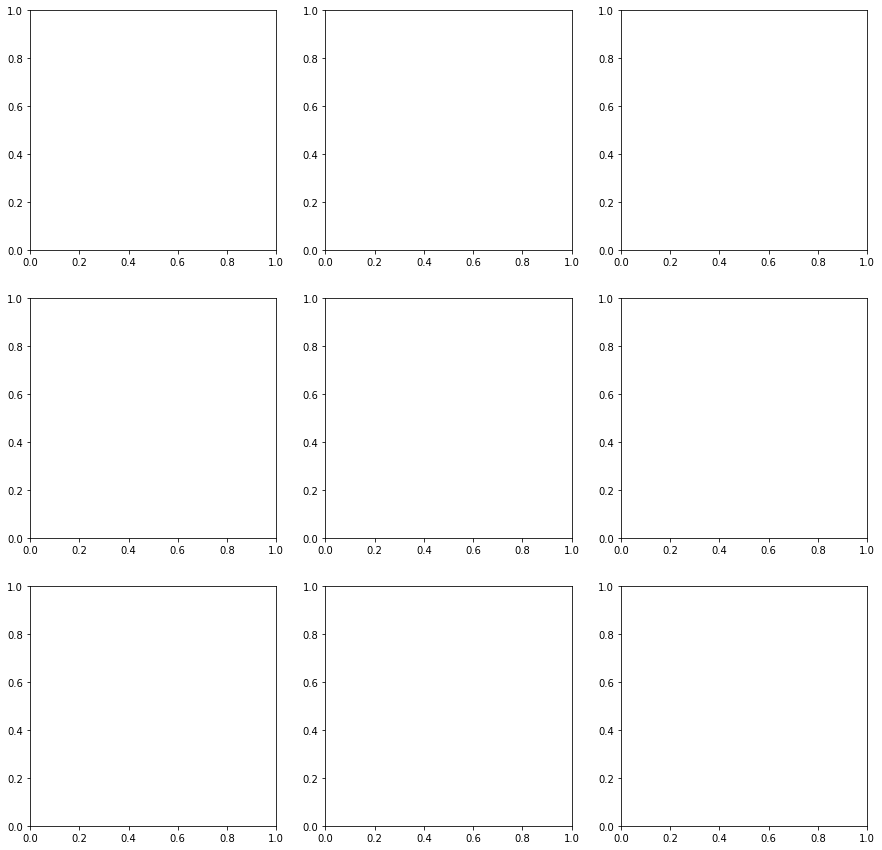

In [149]:
# arr[0].set_title('Processed image')
fig, arr = plt.subplots(3, 3, figsize=(15, 15))
arr[0][0].imshow(plt.imread('0.jpg'))
arr[0][1].imshow(plt.imread('1.png'))
arr[0][2].imshow(plt.imread('2.png'))
arr[1][0].imshow(plt.imread('3.png'))
arr[1][1].imshow(plt.imread('4.png'))
arr[1][2].imshow(plt.imread('5.png'))
arr[2][0].imshow(plt.imread('6.png'))
arr[2][1].imshow(plt.imread('7.png'))
arr[2][2].imshow(plt.imread('8.png'))
fig.savefig('sp4.png')